In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы. 

### Вопросы, на которые нужно ответить в презентации: 
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [80]:
data = pd.read_csv(r"C:\Users\dm199\Downloads\NetflixShows - NetflixShows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [81]:
list_ = data['title'].unique()
np.sort(list_)

array(['10 Things I Hate About You', '100 Metros', '13 Reasons Why', '3%',
       '30 Rock', '5 to 7', '90210', 'A Monster in Paris',
       'A Weekend with the Family', 'Absolutely Fabulous',
       'Abstract: The Art of Design', 'Agent F.O.X.',
       'Air Bud: Spikes Back', 'Air Bud: World Pup', 'Air Buddies',
       'Alice Through the Looking Glass', 'All Hail King Julien',
       'Almost Adults', 'Alpha and Omega: Dino Digs', 'American Crime',
       'American Crime Story: The People v. O.J. Simpson',
       'American Horror Story', 'American Odyssey',
       'Amy Schumer: The Leather Special', 'An American Tail',
       'An American Tail: Fievel Goes West',
       'An American Tail: The Mystery of the Night Monster',
       'An Extremely Goofy Movie', 'Anastasia', 'Angry Birds',
       'Animaniacs', 'Annie', 'Antz', 'Aquarius', 'Army Wives', 'Arrow',
       'Ask the StoryBots', "Atlantis: Milo's Return",
       'Atlantis: The Lost Empire', 'Axel: The Biggest Little Hero',
       

In [82]:
data[data['title'] == 'Goosebumps']

,title,rating,ratingLevel,release year,user rating score
568,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0
632,Goosebumps,PG,"scary and intense creature action and images, ...",2015,90.0
671,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0


In [83]:
data[data['title'] == 'Bordertown']

,title,rating,ratingLevel,release year,user rating score
167,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,86.0
225,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,86.0
449,Bordertown,TV-MA,For mature audiences. May not be suitable for...,2016,NaN


In [62]:
data['title'].duplicated().sum()


504

In [64]:
data=data[data.duplicated()]
data

,title,rating,ratingLevel,release year,user rating score
101,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
118,Marvel's Iron Fist,TV-MA,NaN,2017,98.0
135,Santa Clarita Diet,TV-MA,For mature audiences. May not be suitable for...,2017,82.0
138,Girlboss,TV-MA,NaN,2017,94.0
142,Sandy Wexler,TV-14,NaN,2017,92.0
...,...,...,...,...,...
984,The Magic School Bus,TV-Y,Suitable for all ages.,1997,81.0
988,Paddington,PG,mild action and rude humor,2014,70.0
992,Alpha and Omega: Dino Digs,TV-G,Suitable for all ages.,2016,NaN
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN


In [3]:
dupl = data.copy()
dupl


,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


### Удалите из данных дубликаты. 
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

In [55]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


In [4]:
dupl['duplicated'] = data.duplicated()
dupl

,title,rating,ratingLevel,release year,user rating score,duplicated
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0,False
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN,False
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0,False
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0,False
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0,False
...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0,True
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN,True
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN,False
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN,False


In [5]:
dupl.groupby('user rating score').agg({'duplicated':'count'}).sort_values('duplicated', ascending=False).head(10)

,duplicated
user rating score,
98.0,46
97.0,36
95.0,33
91.0,33
94.0,32
96.0,31
92.0,28
81.0,27
93.0,24


In [6]:
dupl.groupby(['user rating score', 'title']).agg({'duplicated':'count'}).tail(15)

duplicated
user rating score title                              
97.0              The Office (U.S.)                 5
                  Zootopia                          5
98.0              Criminal Minds                    5
                  Family Guy                        2
                  Finding Dory                      5
                  Friends                           5
                  Grey's Anatomy                    6
                  Lost                              1
                  Marvel's Iron Fist                4
                  Once Upon a Time                  3
                  Orange Is the New Black           4
                  Prison Break                      7
                  The Flash                         2
                  The Walking Dead                  2
99.0              13 Reasons Why                    8

In [7]:
data.duplicated().sum()

500

In [8]:
data.isna().sum()

title                  0
rating                 0
ratingLevel           59
release year           0
user rating score    395
dtype: int64

In [9]:
data.columns

Index(['title', 'rating', 'ratingLevel', 'release year', 'user rating score'], dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   release year       1000 non-null   int64  
 4   user rating score  605 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [11]:
data = data.drop_duplicates()
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


Дубликаты возникли из-за повторного записывания в датасет. (ровно половина 500) 

### Сколько рейтинговых групп представлено в данных?

In [12]:
data['rating'].nunique()

13

### Какие оценки пользователи ставят чаще? 

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

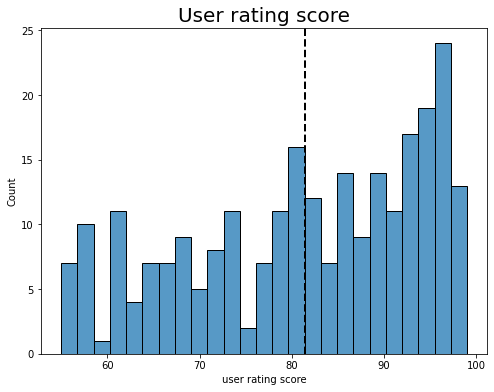

In [13]:
plt.figure(figsize = (8, 6), facecolor='white')
sns.histplot(data = data, x = 'user rating score', bins=25 );
plt.title('User rating score', fontsize= 20)
plt.axvline(data['user rating score'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.savefig('User rating score')


интересные захватывающие шоу вызывают эмоции и люди готовы их оценивать, к тому же порекомендовать знакомым/друзьям/родственникам посмтреть данный контент. Знакомые/друзья/родственники тоже захотят поставить оценку.

### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана? 
- Отличаются ли медиана и среднее? 
- Могут ли данные характеристики значительно отличаться? Почему?

In [14]:
data['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

In [15]:
u_r_s = data['user rating score']

<AxesSubplot:>

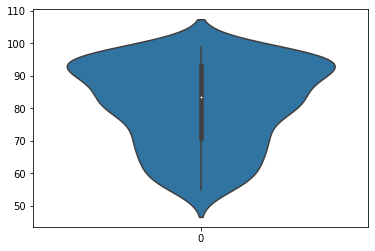

In [16]:
sns.violinplot(data = u_r_s)

### В какие годы были запущены шоу, представленные в датасете?

In [17]:
years = data['release year'].value_counts()
years


2016    146
2015     61
2017     37
2014     35
2013     33
2012     27
2011     15
2010     13
2008     11
2003     11
2005     10
2009     10
2006     10
1997      9
1998      9
2007      8
2000      7
2004      7
2001      6
1999      5
1993      5
2002      5
1994      4
1989      2
1982      2
1990      2
1995      2
1992      1
1991      1
1986      1
1978      1
1940      1
1996      1
1976      1
1987      1
Name: release year, dtype: int64

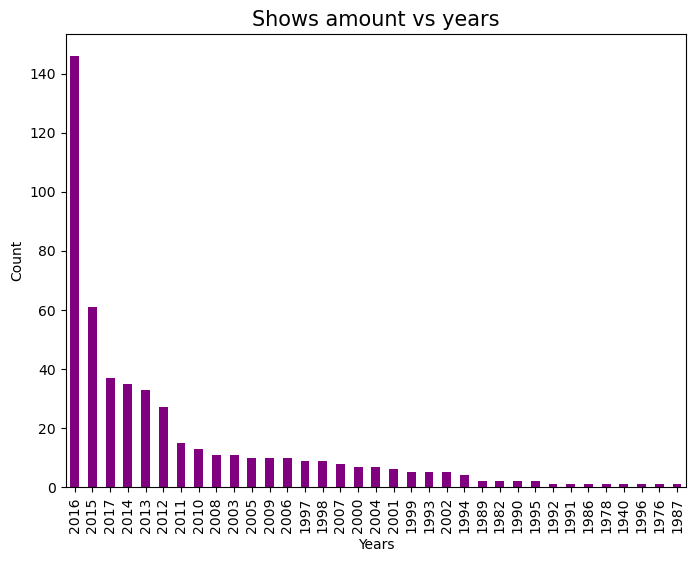

In [18]:
plt.figure(figsize= (8,6), dpi = 100, facecolor='white')
years.plot(kind = 'bar', color = 'purple');
plt.xlabel('Years')
plt.ylabel('Count')
plt.title('Shows amount vs years', fontsize= 15);
plt.savefig('Shows amount vs years')

### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. 

- Наблюдается ли рост? 
- Есть ли выбросы?
- Что из себя представляют выбросы?
- Чем могут быть они вызваны?

### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. 
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки) 
- Как еще можно оценить "Успешность"? 



In [19]:
data[data['release year'] == 2016]['user rating score'].describe()

count    86.000000
mean     84.313953
std      12.599030
min      56.000000
25%      77.000000
50%      89.000000
75%      95.000000
max      98.000000
Name: user rating score, dtype: float64

In [20]:
data[data['release year'] == 2017]['user rating score'].describe()

count    16.000000
mean     88.125000
std       8.585841
min      71.000000
25%      81.750000
50%      90.500000
75%      94.000000
max      99.000000
Name: user rating score, dtype: float64

### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

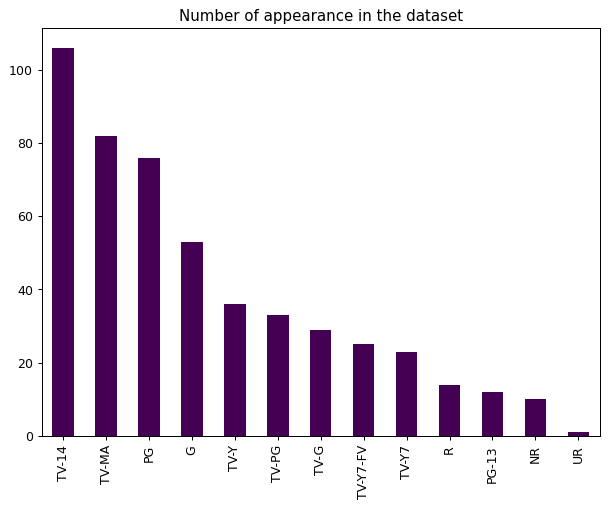

In [21]:
appearance_number = data['rating'].value_counts()
plt.figure(figsize = (8,6), dpi = (90), facecolor='white')
appearance_number.plot(kind = 'bar', cmap='viridis')
plt.title('Number of appearance in the dataset')
plt.savefig('Number of appearanace in the dataset')

In [22]:
appearance_number

TV-14       106
TV-MA        82
PG           76
G            53
TV-Y         36
TV-PG        33
TV-G         29
TV-Y7-FV     25
TV-Y7        23
R            14
PG-13        12
NR           10
UR            1
Name: rating, dtype: int64

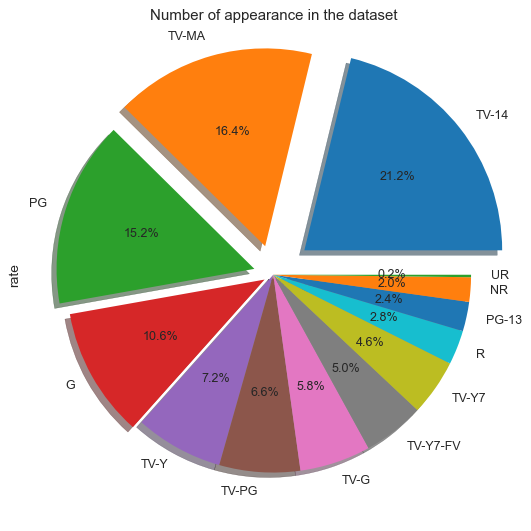

In [85]:
plt.figure(figsize = (8,6), dpi = (90), facecolor='white')
explode = (0.2, 0.15, 0.1, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(appearance_number, explode = explode, labels = appearance_number.index, autopct='%1.1f%%', shadow=True);
plt.title('Number of appearance in the dataset')
plt.tight_layout()
plt.ylabel('rate')
plt.savefig('Number of appearanace in the dataset1')
#более интепретируемый

При большом количестве групп лучше использовать гистограмму, чем круглую диаграмму.

### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) 
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [24]:
data.columns

Index(['title', 'rating', 'ratingLevel', 'release year', 'user rating score'], dtype='object')

In [25]:
data['title'].nunique()

496

In [26]:
data.head(15)

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0


In [27]:
data[data['title'] == 'Breaking Bad']

,title,rating,ratingLevel,release year,user rating score
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0


In [28]:
comparison = data.groupby('rating').agg({'user rating score':'mean'})
comparison

,user rating score
rating,
G,74.421053
NR,77.000000
PG,84.104167
PG-13,71.444444
R,85.285714
TV-14,82.870130
TV-G,74.363636
TV-MA,84.825000
TV-PG,83.809524


In [29]:
comparison.index

Index(['G', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG',
       'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'],
      dtype='object', name='rating')

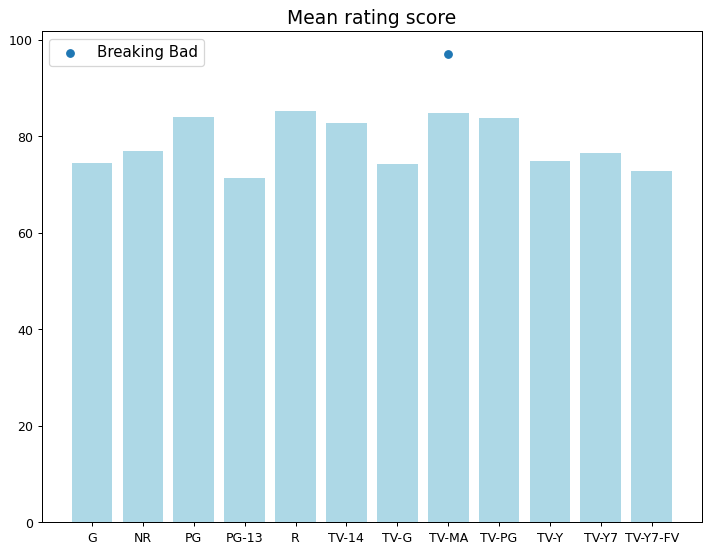

In [30]:
fig, ax = plt.subplots(figsize=(8,6), dpi = 90, facecolor = 'white' )

ax.bar(comparison.index, comparison['user rating score'], color = 'lightblue' )
ax.scatter(data[data['title'] == 'Breaking Bad']['rating'], data[data['title'] == 'Breaking Bad']['user rating score'],\
           label = 'Breaking Bad')
plt.tight_layout()
plt.title('Mean rating score', fontsize=15)
ax.legend(fontsize=12);
fig.savefig('Mean rating score', bbox_inches='tight')

In [31]:
data[data['title'] == 'Breaking Bad'][['rating','user rating score']]

,rating,user rating score
6,TV-MA,97.0


In [32]:
data[data['title'] == 'Breaking Bad']

,title,rating,ratingLevel,release year,user rating score
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0


In [33]:
bb_rate = data[data['rating'] == 'TV-MA']['user rating score']
bb_rate.describe()


count    40.000000
mean     84.825000
std      12.775954
min      56.000000
25%      80.000000
50%      89.000000
75%      95.000000
max      99.000000
Name: user rating score, dtype: float64

In [34]:
bb_rate[0:1]

6    97.0
Name: user rating score, dtype: float64

C:\Users\dm199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dm199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


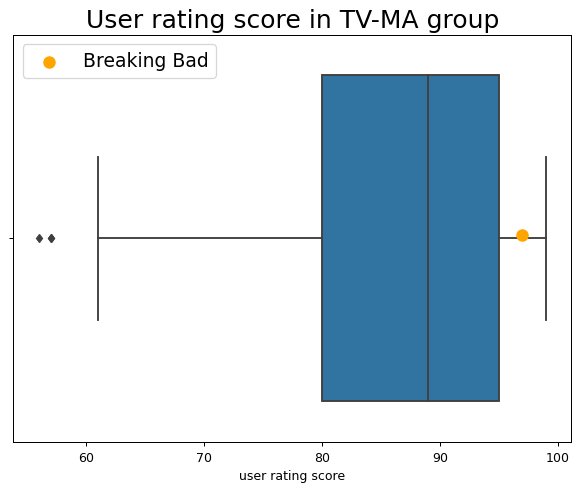

In [35]:
plt.figure(figsize=(8,6), dpi = 90, facecolor = 'white' )
sns.boxplot(bb_rate) 
sns.stripplot(bb_rate[0:1], size=10, color='orange', label = 'Breaking Bad' )
plt.legend(fontsize = 15)
plt.title('User rating score in TV-MA group', fontsize=20);
plt.savefig('User rating score in TV-MA group')

In [36]:
bb_year = data[data['release year'] == 2013]['user rating score']
bb_year.describe()

count    11.000000
mean     76.909091
std      14.720425
min      57.000000
25%      62.000000
50%      81.000000
75%      88.500000
max      97.000000
Name: user rating score, dtype: float64

C:\Users\dm199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dm199\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


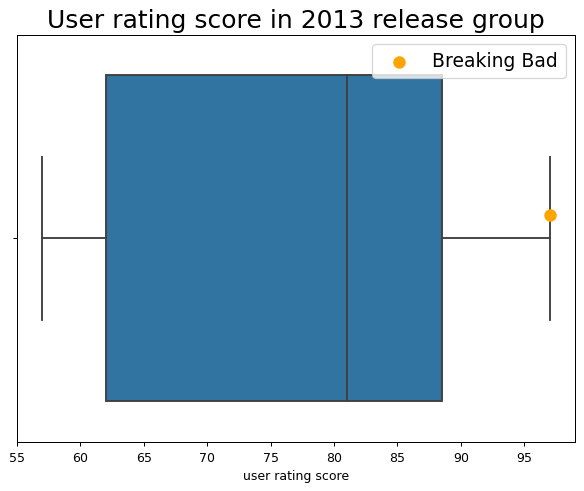

In [37]:
plt.figure(figsize=(8,6), dpi = 90, facecolor = 'white' )
sns.boxplot(bb_year)
sns.stripplot(bb_rate[0:1], size=10, color='orange', label = 'Breaking Bad' )
plt.legend(fontsize = 15)
plt.title('User rating score in 2013 release group', fontsize=20);
plt.savefig('User rating score in 2013 release group')

In [38]:
bb_year_vs_rate = data[data['release year'] == 2013]['rating']
bb_year_vs_rate = bb_year_vs_rate.value_counts()
bb_year_vs_rate

TV-14       7
TV-G        5
TV-MA       4
PG          4
TV-Y        3
TV-Y7-FV    3
NR          2
TV-PG       2
PG-13       1
G           1
TV-Y7       1
Name: rating, dtype: int64

In [39]:
bb_year_vs_rate.index

Index(['TV-14', 'TV-G', 'TV-MA', 'PG', 'TV-Y', 'TV-Y7-FV', 'NR', 'TV-PG',
       'PG-13', 'G', 'TV-Y7'],
      dtype='object')

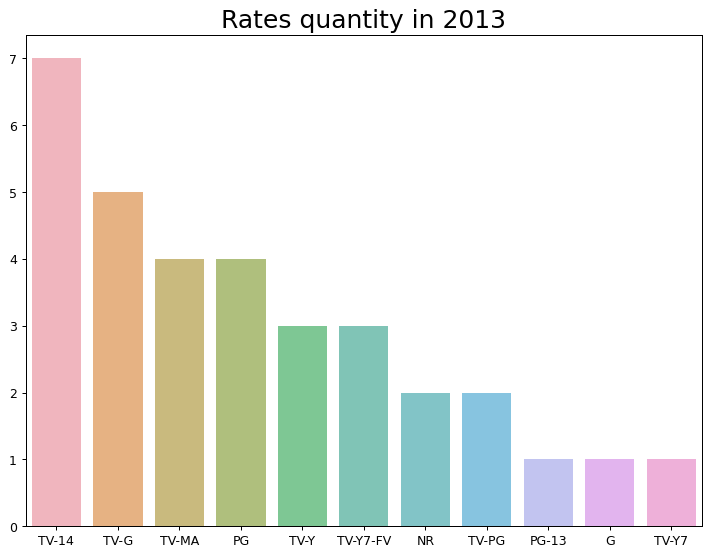

In [40]:
plt.figure(figsize=(8,6), dpi = 90, facecolor = 'white' )
sns.barplot( x =bb_year_vs_rate.index, y = bb_year_vs_rate.values, alpha = 0.7)
plt.tight_layout()
plt.title('Rates quantity in 2013', fontsize=20);
plt.savefig('Rates quantity in 2013', bbox_inches='tight')

In [42]:
BB = data[data['title'] == 'Breaking Bad']
BB

,title,rating,ratingLevel,release year,user rating score
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0


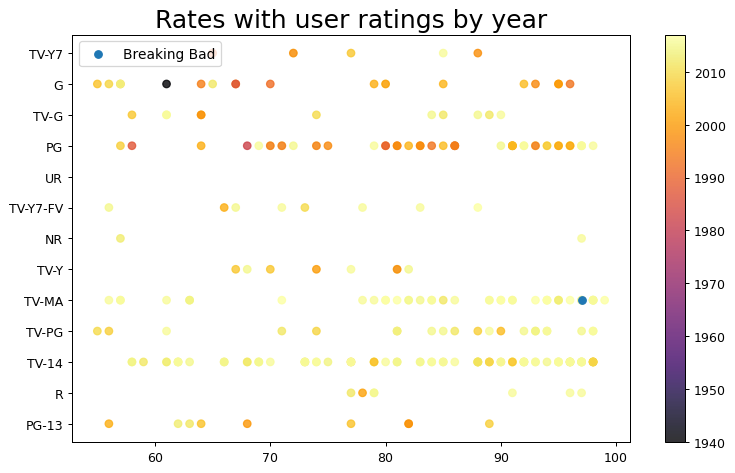

In [43]:
fig, ax = plt.subplots(ncols=1, nrows = 1, figsize=(10,6), dpi = 90, facecolor = 'white' )



plt.scatter( data['user rating score'], data['rating'], c = data['release year'], cmap='inferno', alpha = 0.8)
ax.scatter( BB['user rating score'], BB['rating'], label = 'Breaking Bad')
plt.colorbar()
plt.legend( fontsize=11, loc = 2)
plt.title('Rates with user ratings by year', fontsize=20);
plt.savefig('Rates with user ratings by year', bbox_inches='tight')

In [44]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


In [45]:
from pandas_profiling import ProfileReport

In [46]:
profile = ProfileReport(data, title="Netflix Profiling Report")
profile.to_notebook_iframe()